# Clustering

Clustering is the task of forming groups of similar objects in a way that objects in the same group are more similar than objects in different groups. Here, given an object, we want to know which group it belongs to.

## $k$-Means Clustering

$k$-Means is one of the oldest and simplest clustering algorithms. It tries to find "cluster centers" (aka centroids) that explain the group.


$k$-Means can be described in two main steps: (1) Assignment step and (2) Update step. In the first step, k-Means assigns each object to the closest center. In the second step, the centroids are updated according to the objects assigned to each group. The algorithm is finished when there are no changes in the assignment step.

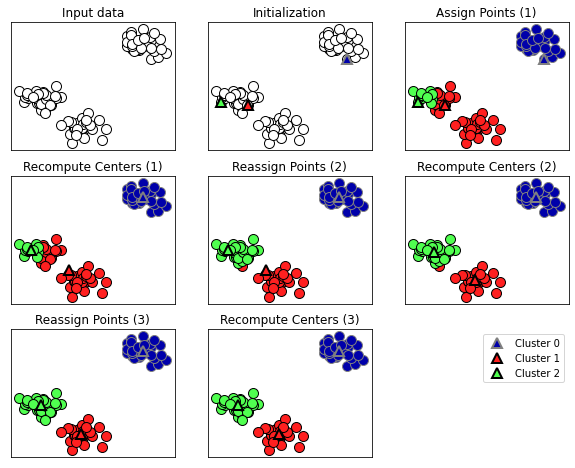

In [1]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

Above is an example of k-means execution. (1) We only have the dataset (without classes); (2) k-means chooses initial centroids according to some rule (randomly by default); (3) Assign points (or objects) to the closest centroid; (4) Recompute the centroids; (5) Reassign each data point; (6) Recompute the centroids; and so on.

We also can see the cluster boundaries found by k-means

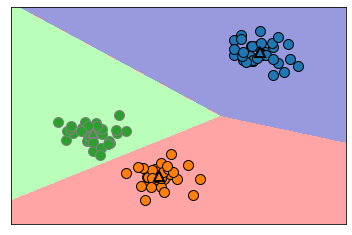

In [2]:
mglearn.plots.plot_kmeans_boundaries()


### Applying k-means to synthetic data

Here we create a synthetic dataset and apply k-means on it to find 3 clusters (groups).

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X);

What are the membership of each data point?

In [4]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


We can also apply an existing model to new data. Here, we have the same results as above.

In [5]:
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


Visually it is easier to understand what is going on. k-means found the 3 clusters we wanted and assigned each data point to the corresponding cluster.

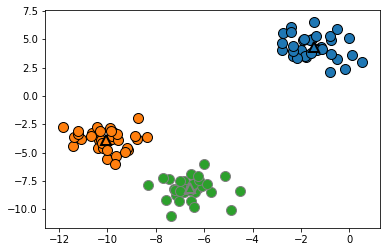

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2);

It is important to notice that, we do not know how many cluster a dataset has by nature. Therefore, choosing an apropriate k value can make a huge difference in the results. Besides other most robust methods, a magic number for k is sqrt(N/2) in which N is the number of data points.

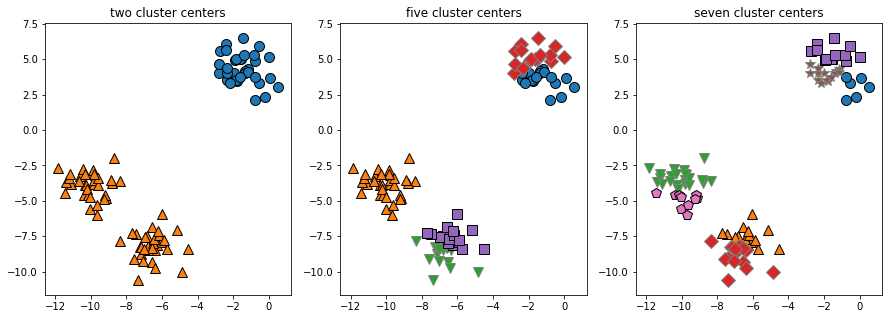

In [7]:
import math
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
axes[0].set_title('two cluster centers')

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1]);
axes[1].set_title('five cluster centers')

# using 7 cluster centers:
kmeans = KMeans(n_clusters=int(math.sqrt(X.shape[0]/2)))
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[2]);
axes[2].set_title('seven cluster centers');

You can think 3 clusters are "the correct answer", but the truth is that, as we do not know the real answer, clustering is a very relative task. Why 2 or 7 clusters may be wrong?

The Elbow is a very popular method to select the best k for k-means. It consist of selecting k based on the point of inflection of the sum of squares erros (distortion).

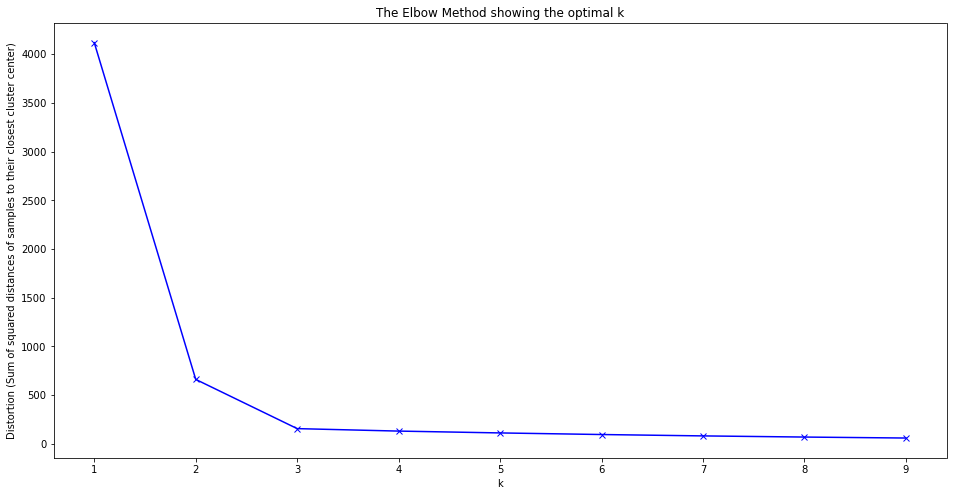

In [8]:
distortions = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion (Sum of squared distances of samples to their closest cluster center)')
plt.title('The Elbow Method showing the optimal k')
plt.show();

Considering the k-means main assumption. $k$ = 3 seems to be the best choice.

### Failure cases of $k$-means

$k$-means defines each cluster based on its center. So it is very good to find blobs (convex shape) of similar diameter. Below is an example in which k-means fail to find the two clusters formed by the moon dataset.

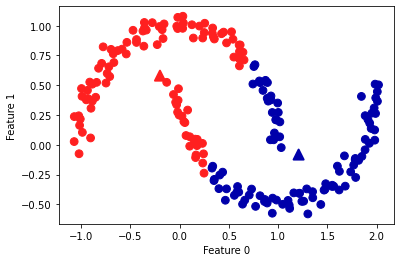

In [9]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
 marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

We can try to overcome this issue using more centroids (components) to explain the dataset.

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


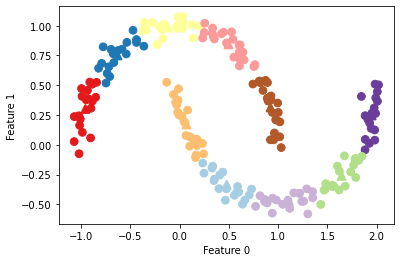

In [10]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("Cluster memberships:\n{}".format(y_pred));

Okay. It does not find the two clusters but now we can use a linear model to separate the two halfs of the moons.

## Vector quantization, or seeing $k$-means as decomposition

An interesting aspect of $k$-means is its similarity to PCA and NMF. While PCA tries to explain the data using directions of maximum variance and NMF tries to explain using additive components. $k$-means tries to explain the data using cluster centers (centroids). Seeing $k$-means as a decomposition method is named vector quantization. Let's see an application in people's face dataset.

### Loading and pre-processing the data

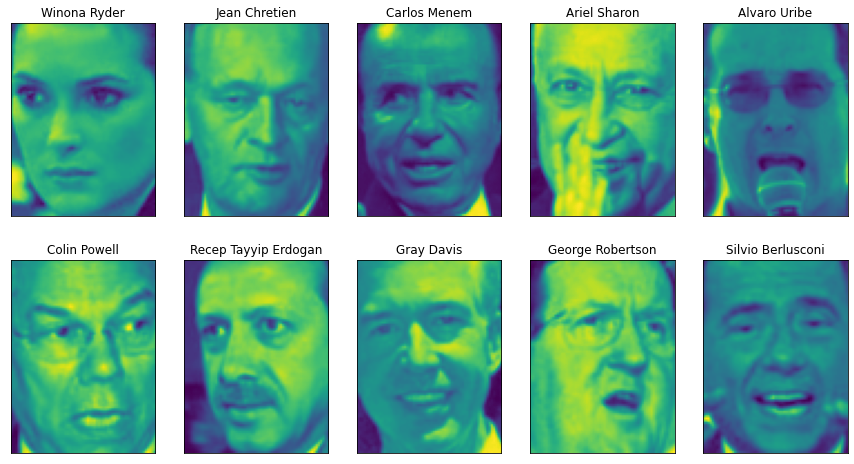

In [11]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [13]:
import numpy as np

# Sample each class with 50 examples.
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

#### Fit each decomposition method

In [14]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_);

C:\Users\prove\anaconda3\envs\dsp\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\prove\anaconda3\envs\dsp\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


#### Plot the results for each decomposition method

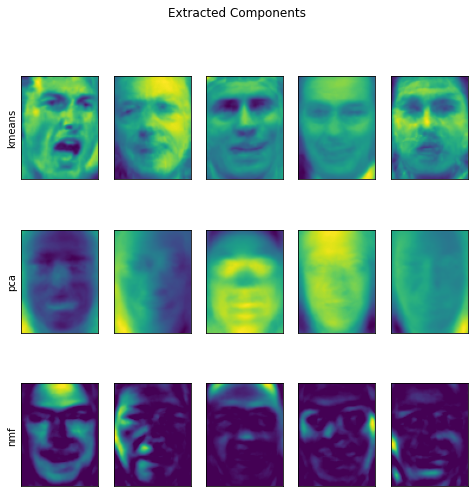

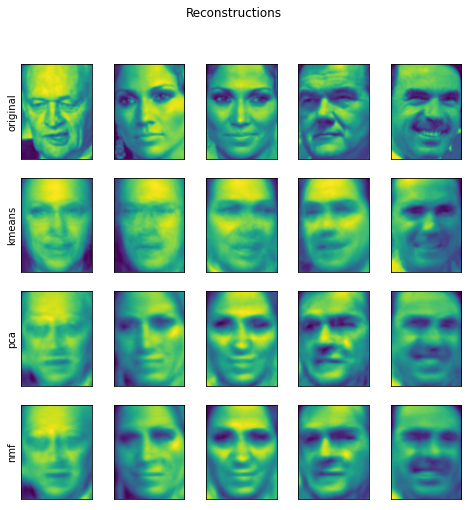

In [15]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("Reconstructions")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf");

$k$-means is very fast and simple algorithm that assumes that a cluster is formed by the data points that minimizes the sum of squared errors.
Choosing $k$ and random initialization are some gaps. 